# Car Dataset Analysis and Linear Regression
-------------------------------------------------

This project involves the analysis of a car dataset using Python and Pandas, focusing on exploring, cleaning, and modeling the data. The dataset contains information about various car features, including fuel economy (mpg), horsepower, acceleration, and more.

## Tasks

### Step 1: Read the dataset and examine how many features and examples does it have.

In [ ]:
import pandas as pd

# The path of dataset
file_path = 'cars.csv'

# Load the dataset into a Pandas DataFrame
Dataframe = pd.read_csv(file_path)

num_examples, num_features = Dataframe.shape
print(f"\nThe dataset has {num_examples} examples and {num_features} features.")

### Step 2: Check for missing values

In [ ]:
missing_values = Dataframe.isnull().sum()
print(f"\nMissing values:\n{missing_values}")

### Step 3: Fill missing values using a proper imputation method.

In [ ]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_columns = Dataframe.select_dtypes(include='number').columns
non_numeric_columns = Dataframe.select_dtypes(exclude='number').columns

# Fill missing values for numeric columns using the mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
Dataframe[numeric_columns] = numeric_imputer.fit_transform(Dataframe[numeric_columns])

# Fill missing values for non-numeric columns using the most frequent value (mode)
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
Dataframe[non_numeric_columns] = non_numeric_imputer.fit_transform(Dataframe[non_numeric_columns])

print("Missing values after imputation:")
print(Dataframe.isnull().sum())

### Step 4: Box plot for fuel economy by country.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='origin', y='mpg', data=Dataframe)
plt.title('4. Fuel Economy by Country')
plt.xlabel('Country')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

### Step 5: Histograms for each feature.

In [ ]:
sns.histplot(Dataframe['acceleration'])
plt.title('5. Acceleration Distribution')
plt.xlabel('Acceleration')
plt.ylabel('Density')
plt.show()

In [ ]:
sns.histplot(Dataframe['horsepower'], color = 'red')
plt.title('5. Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Density')
plt.show()

In [ ]:
sns.histplot(Dataframe['mpg'], color = 'green')
plt.title('5. MPG Distribution')
plt.xlabel('MPG')
plt.ylabel('Density')
plt.show()

### Step 6: Quantitative measure for similarity to Gaussian.

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

features = ['acceleration', 'horsepower', 'mpg']

# Assuming 'features' is a list of the features you want to analyze
for feature in features:
    # Plot histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(Dataframe[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    # Calculate skewness
    skewness = skew(Dataframe[feature])
    
    # Annotate skewness on the plot
    plt.annotate(f'Skewness: {skewness:.2f}', 
                 xy=(0.7, 0.9), 
                 xycoords='axes fraction', 
                 ha='center', 
                 va='center',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'),
                 fontsize=10)
    
    plt.show()



### Step 7: Scatter plot for 'horsepower' vs 'mpg'.

In [ ]:
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('7. Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

### Step 8: Closed form solution of linear regression.

C:\Users\coolnet\AppData\Local\Temp\ipykernel_106652\503178933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_linear['x0'] = 1


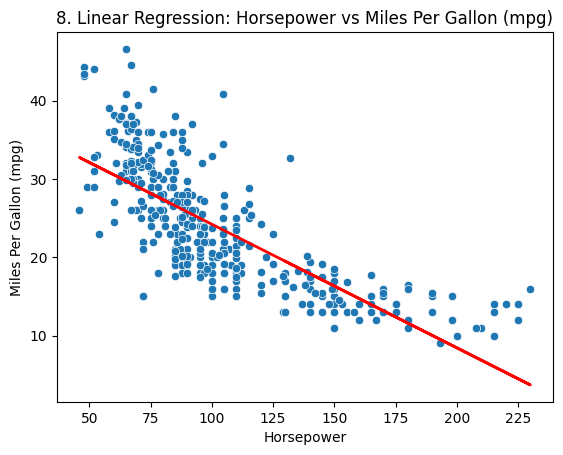

In [35]:
import warnings

X_linear = Dataframe[['horsepower']]
X_linear['x0'] = 1
y_linear = Dataframe['mpg']

w_linear = np.linalg.inv(X_linear.T.dot(X_linear)).dot(X_linear.T).dot(y_linear)

# Scatter plot
#plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('8. Linear Regression: Horsepower vs Miles Per Gallon (mpg)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')

# Plotting the regression line
plt.plot(X_linear['horsepower'], X_linear.dot(w_linear), color='red', linewidth=2)
plt.show()